In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("data_before_scale_last6.csv")
d1 = data[data['time_diff'] > 5]
d1 = d1[d1['time_diff'] <= 10]

d11 = data[data['time_diff'] > 10]
d11 = d11[d11['time_diff'] <= 15]

d12 = data[data['time_diff'] > 15]
d12 = d12[d12['time_diff'] <= 20]

d2 = data[data['time_diff'] > 24]
d2 = d2[d2['time_diff'] <= 216]
d3 = data[data['time_diff'] > 216]
d3 = d3[d3['time_diff'] <= 432]
print(d1['dist_diff'].median())
print(d11['dist_diff'].median())
print(d12['dist_diff'].median())
print(d2['dist_diff'].median())
print(d3['dist_diff'].median())

6.702084664561606
7.254605582735489
6.755483343718163
4.986340754819062
5.961944022063521


1854
0.8171521035598706


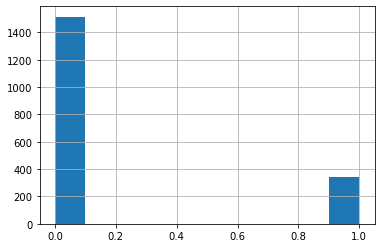

In [5]:
data = pd.read_csv("data_before_scale_first6.csv")
change = []
i = 0
for ind in data.index:
    if i % 6 == 0:
        change.append(1)
        cur = data['cluster_grp'][ind]
    else:
        if cur == data['cluster_grp'][ind]:
            change.append(0)
        else:
            change.append(1)
        cur = data['cluster_grp'][ind]
    i += 1
data['change'] = change
d1 = data[data['time_diff']>5]
d1 = d1[d1['time_diff'] <= 72]
d1['change'].hist()     
    

print(len(d1))
print(len(d1[d1['change'] == 0])/len(d1)) ##when having a meetup within 3 days, 81% times the previous meetup cluster remains the same.

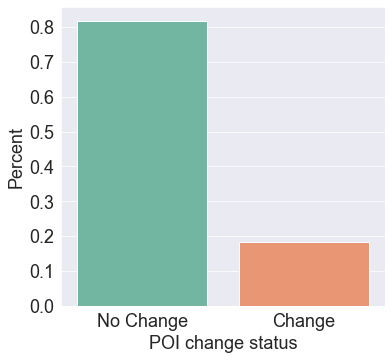

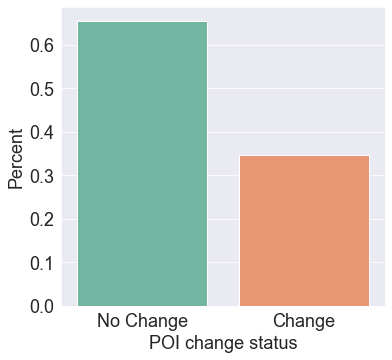

In [6]:
data = pd.read_csv("data_before_scale_first6.csv")
change = []
i = 0
for ind in data.index:
    if i % 6 == 0:
        change.append("change")
        cur = data['cluster_grp'][ind]
    else:
        if cur == data['cluster_grp'][ind]:
            change.append("no change")
        else:
            change.append("change")
        cur = data['cluster_grp'][ind]
    i += 1
data['change'] = change
d1 = data[data['time_diff']>5]
d1 = d1[d1['time_diff'] <= 72]
#d1['change'].hist()     

ga = d1[d1.change == "no change"]
gb = d1[d1.change == "change"]

df = pd.DataFrame({
    'POI change': ['No Change','Change'],
    'Percent': [len(ga)/len(d1), len(gb)/len(d1)]})
    
sns.set_style('darkgrid')
sns.set_palette('Set2')
fig = plt.figure(figsize=(5.8,5.5))

#create grouped bar chart
ax = sns.barplot(x='POI change', y='Percent', data=df)
plt.xlabel('POI change status', fontsize = 18)
plt.ylabel('Percent', fontsize = 18)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
#plt.legend(fontsize = 15,loc = 'upper left')
plt.show()
fig.savefig('fig_stdiff_small.eps')

d1 = data[data['time_diff']>2000]
ga = d1[d1.change == "no change"]
gb = d1[d1.change == "change"]

df = pd.DataFrame({
    'POI change': ['No Change','Change'],
    'Percent': [len(ga)/len(d1), len(gb)/len(d1)]})
    
sns.set_style('darkgrid')
sns.set_palette('Set2')
fig = plt.figure(figsize=(5.8,5.5))

#create grouped bar chart
ax = sns.barplot(x='POI change', y='Percent', data=df)
plt.xlabel('POI change status', fontsize = 18)
plt.ylabel('Percent', fontsize = 18)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
#plt.legend(fontsize = 15,loc = 'upper left')
plt.show()
fig.savefig('fig_stdiff_large.eps')

#print(len(d1))
#print(len(d1[d1['change'] == 0])/len(d1)) ##when having a meetup within 3 days, 81% times the previous meetup cluster remains the same.

8652
454
0.3458149779735683
367


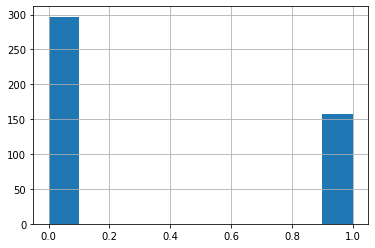

In [6]:
data = pd.read_csv("data_before_scale_first6.csv")
change = []
i = 0
for ind in data.index:
    if i % 6 == 0:
        change.append(1)
        cur = data['cluster_grp'][ind]
    else:
        if cur == data['cluster_grp'][ind]:
            change.append(0)
        else:
            change.append(1)
        cur = data['cluster_grp'][ind]
    i += 1
data['change'] = change
d1 = data[data['time_diff']>2000]
#d1 = d1[d1['time_diff'] <= 10]
d1['change'].hist() 


print(len(data))
print(len(d1))
print(len(d1[d1['change'] == 1])/len(d1)) ##percent of people who change cluster when having a meetup after 4 month or more interval
print(d1['userid'].nunique())

even though spatio-temporal correlation does not completely comply in the case of group meetup events, it is still 
hepful to predict extreme cases. When the time interval between the consecutive meetup events is small such as 1/3 days, in 81% cases, the cluster doesn't change. On the other side, when the interval is as long as 2.5 month or more, in 35% cases the cluster changes and such incidents might indicate a change in location which may persist for the rest or at least some more days or couple of weeks. The spatio-temporal correlation is particularly effective in tackling such extreme longer or shorter interval events.

In [5]:
def prob_of_presense(day,period,user,clstr): ##df --> all meet up data // backup2
    #df = df[df['userid'] == user] ###old line
    df = pd.read_csv("all_user_cluster.csv") #newline
    df = df[df['userId'] == user]
    length = len(df)
    df = df[df['day']==day]
    df = df[df['period']==period]
    df = df[df['cluster_grp'] == clstr]
    return len(df)/(length * 1.00)

data = pd.read_csv("all_user_cluster.csv")
data = data.sample(n=8652, replace = False)
pp = []
for ind in data.index:
    pp.append(prob_of_presense(data['day'][ind],data['period'][ind],data['userId'][ind],data['cluster_grp'][ind]))
data['pp'] = pp

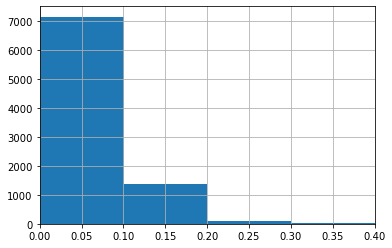

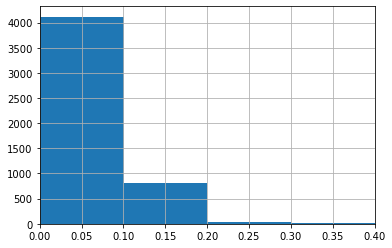

In [7]:
#data.to_csv("random_pp.csv", index = False)
data = pd.read_csv("random_pp.csv")
data['pp'].hist()
plt.xlim(0,0.40)
plt.show()
dp = data.sample(n=5000, replace = False)
dp['pp'].hist()
plt.xlim(0,.40)
plt.show()

8652


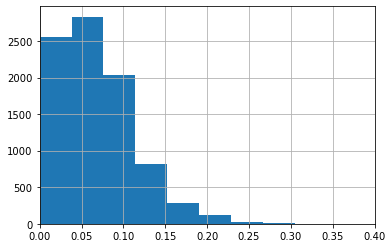

"p = []\ni = 1\nfor ind in d.index:\n    if i % 6 == 0:\n        p.append(d['prob_of_pres'][ind])\n    i+=1\np_df = pd.DataFrame()\np_df['pp'] = p\np_df['pp'].hist()\nplt.show()\np_df['pp'].median()"

In [11]:
d = pd.read_csv("data_final_first6.csv")
print(len(d))
d['prob_of_pres'].hist()
plt.xlim(0,.40)
plt.show()
'''p = []
i = 1
for ind in d.index:
    if i % 6 == 0:
        p.append(d['prob_of_pres'][ind])
    i+=1
p_df = pd.DataFrame()
p_df['pp'] = p
p_df['pp'].hist()
plt.show()
p_df['pp'].median()'''

In [9]:
dlast = pd.read_csv("data_final_last6.csv")
is_meetup = []
for ind in data.index:
    usr = data['userId'][ind]
    cls = data['cluster_grp'][ind]
    dx = d[d['userid'] == usr]
    if len(dx) == 0:
        dx = dlast[dlast['userid'] == usr]
        if len(dx) == 0:
            is_meetup.append(0)
            continue
        else:
            if len(dx[dx['cluster_grp'] == cls]) == 0:
                is_meetup.append(0)
                continue
            else:
                is_meetup.append(1)
    else:
        if len(dx[dx['cluster_grp'] == cls]) == 0:
            is_meetup.append(0)
            continue
        else:
            is_meetup.append(1)
data['is_meetup'] = is_meetup
    

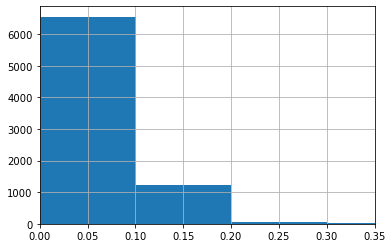

7899
0.0571428571428571


In [8]:
data_notmeet = data[data['is_meetup'] == 0]
data_notmeet['pp'].hist()
plt.xlim(0,0.35)
plt.show()
print(len(data_notmeet))
print(data_notmeet['pp'].median())

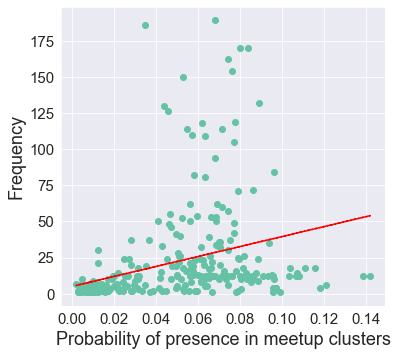

In [7]:
sns.set_style('darkgrid')
sns.set_palette('Set2')
d = pd.read_csv("data_final_first6.csv")
cls = d['cluster_grp'].unique()
avgpp = []
meetct = []
for i in cls:
    a = d[d['cluster_grp'] == i]
    if len(a) > 200:
        continue
    #if a['prob_of_pres'].mean() > 0.12:
        #continue
    meetct.append(len(a))
    avgpp.append(a['prob_of_pres'].median())
#fig = plt.figure(figsize=(6.5,5.5))
fig = plt.figure(figsize=(5.8,5.5))
plt.scatter(avgpp,meetct)
z = np.polyfit(avgpp,meetct, 1)
p = np.poly1d(z)
plt.plot(avgpp, p(avgpp), "r--")
plt.xlabel('Probability of presence in meetup clusters', fontsize = 18)
plt.ylabel('Frequency', fontsize = 18)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()
fig.savefig('fig_pp.eps')

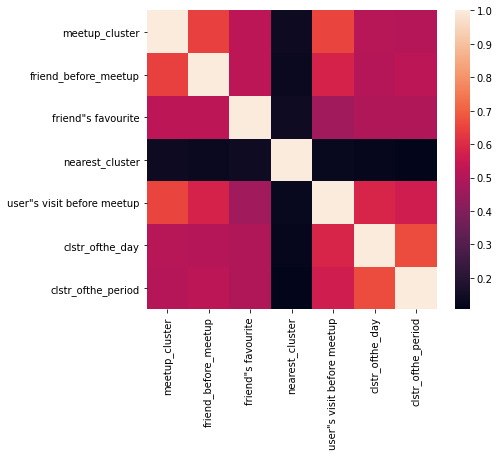

In [2]:
### this section is for friends features:
sns.set_palette('Set1')
fig = plt.figure(figsize=(6.5,5.5))
'''data = pd.read_csv("data_final_first6.csv")
print(data.dtypes)
data = data.drop(['latitude','longitude','time_diff','dist_diff','userid','day','month','date','hour','year',
               'period','prob_of_pres'], axis = 1)
data.corr()'''
#meetup_cluster-> actual meetup cluster
#cof-> favourite cluster of the top frind during meetup time
#clstr_frnd -> cluster that top friend visit before the meetup time
#nc -> nearest cluster of the meetup cluster
#near_cls_grp -> cls that a user visit before meetup

data2 = pd.read_csv("data_figure.csv")
data2 = data2.drop(['latitude','longitude','time_diff','dist_diff','userid','day','month','date','hour','year',
               'period','prob_of_pres'], axis = 1)
data2.rename(columns = {'cluster_grp':'meetup_cluster','clsoffrnd':'cof','clstr_of_friend':'clstr_frnd',
                       'nearest_cluster':'nc','near_cluster':'near_cls_grp'}, inplace = True)
'''print(data2.dtypes)
print(data2.corr())'''
#fig.savefig('fig_stdiff_small.eps')
#sns.heatmap(data2.corr())


data3 = pd.DataFrame()
data3['meetup_cluster'] = data2['meetup_cluster']
data3['friend_before_meetup'] = data2['clstr_frnd']
data3['friend"s favourite'] = data2['cof']
data3['nearest_cluster'] = data2['nc']
data3['user"s visit before meetup'] = data2['near_cls_grp']
data3['clstr_ofthe_day'] = data2['clstr_ofthe_day']
data3['clstr_ofthe_period'] = data2['clstr_ofthe_period']
sns.heatmap(data3.corr())
plt.show()
fig.savefig('heatmap.eps')

5776   1142


<Figure size 360x216 with 0 Axes>

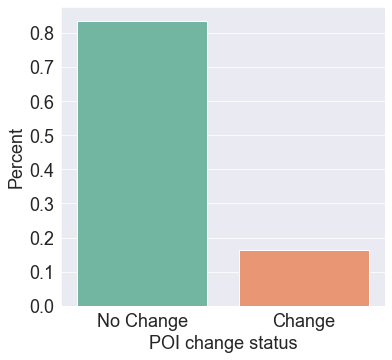

In [2]:
sns.set_style('darkgrid')
sns.set_palette('Set2')
fig = plt.figure(figsize=(5,3))
data2 = pd.read_csv("data_figure.csv")
ismatch = []
for ind in data2.index:
    if data2['near_cluster'][ind] == data2['cluster_grp'][ind]:
        ismatch.append("No Change")
    else:
        ismatch.append("Change")
data2['m'] = ismatch

ga = len(data2[data2['m'] == "No Change"])
gb = len(data2[data2['m'] == "Change"])
print(ga," ",gb)

df = pd.DataFrame({
    'POI change': ['No Change','Change'],
    'Percent': [ga/(ga+gb), gb/(ga+gb)]})
    
sns.set_style('darkgrid')
sns.set_palette('Set2')
fig = plt.figure(figsize=(5.8,5.5))

#create grouped bar chart
ax = sns.barplot(x='POI change', y='Percent', data=df)
#plt.xlabel('cluster change of user"s visit before meetup and meetup', fontsize = 20)
plt.xlabel('POI change status', fontsize = 18)
plt.ylabel('Percent', fontsize = 18)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
#plt.legend(fontsize = 15,loc = 'upper left')
plt.show()
fig.savefig('near_cluster.eps')

5375   1543


<Figure size 360x216 with 0 Axes>

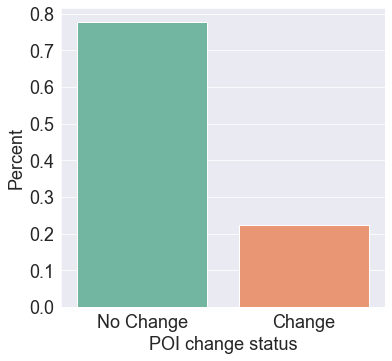

In [4]:
sns.set_style('darkgrid')
sns.set_palette('Set2')
fig = plt.figure(figsize=(5,3))
data2 = pd.read_csv("data_figure.csv")
ismatch = []
for ind in data2.index:
    if data2['clsoffrnd'][ind] == data2['cluster_grp'][ind]:
        ismatch.append("No Change")
    else:
        ismatch.append("Change")
data2['m'] = ismatch

ga = len(data2[data2['m'] == "No Change"])
gb = len(data2[data2['m'] == "Change"])
print(ga," ",gb)

df = pd.DataFrame({
    'POI change': ['No Change','Change'],
    'Percent': [ga/(ga+gb), gb/(ga+gb)]})
    
sns.set_style('darkgrid')
sns.set_palette('Set2')
fig = plt.figure(figsize=(5.8,5.5))

#create grouped bar chart
ax = sns.barplot(x='POI change', y='Percent', data=df)
#plt.xlabel('cluster change of user"s visit before meetup and meetup', fontsize = 20)
plt.xlabel('POI change status', fontsize = 18)
plt.ylabel('Percent', fontsize = 18)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
#plt.legend(fontsize = 15,loc = 'upper left')
plt.show()
fig.savefig('cof.eps')

5607   1311


<Figure size 360x216 with 0 Axes>

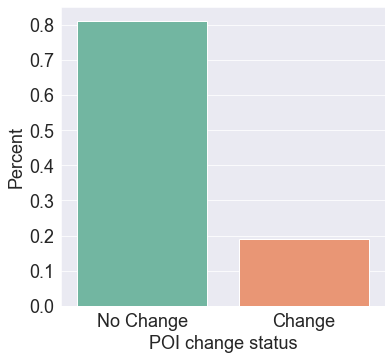

In [3]:
sns.set_style('darkgrid')
sns.set_palette('Set2')
fig = plt.figure(figsize=(5,3))
data2 = pd.read_csv("data_figure.csv")
ismatch = []
for ind in data2.index:
    if data2['clstr_of_friend'][ind] == data2['cluster_grp'][ind]:
        ismatch.append("No Change")
    else:
        ismatch.append("Change")
data2['m'] = ismatch

ga = len(data2[data2['m'] == "No Change"])
gb = len(data2[data2['m'] == "Change"])
print(ga," ",gb)

df = pd.DataFrame({
    'POI change': ['No Change','Change'],
    'Percent': [ga/(ga+gb), gb/(ga+gb)]})
    
sns.set_style('darkgrid')
sns.set_palette('Set2')
fig = plt.figure(figsize=(5.8,5.5))

#create grouped bar chart
ax = sns.barplot(x='POI change', y='Percent', data=df)
#plt.xlabel('cluster change of user"s visit before meetup and meetup', fontsize = 20)
plt.xlabel('POI change status', fontsize = 18)
plt.ylabel('Percent', fontsize = 18)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
#plt.legend(fontsize = 15,loc = 'upper left')
plt.show()
fig.savefig('clstr_of_friend.eps')

In [32]:
##next week's task: format the references. reference appropriate figures in the new subplot. Remove irrelevant ones. 
##correction of caption of the figures.
#write the features and correlate with figures